In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ProteinFoldSimulator:
    """
    Simulator for 3D lattice-based protein folding on a tetrahedral lattice.

    Provides methods to generate random turn sequences, compute bead positions,
    and visualize the resulting fold in 3D.
    """
    # 3D step vectors for tetrahedral lattice ('A' and 'B' sublattices)
    lattice_vectors = {
        'A': [(1, 1, 1), (1, -1, -1), (-1, 1, -1), (-1, -1, 1)],
        'B': [(1, 1, -1), (1, -1, 1), (-1, 1, 1), (-1, -1, -1)]
    }

    def __init__(self, N):
        """
        Initialize simulator for a chain of length N.
        The first two turns are fixed by symmetry.
        """
        self.N = N
        self.turn_indices = []
        self.positions = []

    def get_direction(self, site, turn):
        """
        Return the 3D step vector for sublattice 'A' or 'B' and turn index (0-3).
        """
        try:
            return self.lattice_vectors[site][turn]
        except (KeyError, IndexError):
            raise ValueError("site must be 'A' or 'B', and turn must be 0-3")

    def random_turn_sequence(self):
        """
        Generate a random sequence of turn indices (0-3) for beads 3 to N.
        First two turns are fixed by symmetry: [1, 0].
        """
        seq = [1, 0]  # fixed initial turns
        for _ in range(2, self.N - 1):
            seq.append(np.random.randint(0, 4))
        self.turn_indices = seq
        return seq

    def compute_positions(self, turn_indices=None):
        """
        Compute bead positions given a list of turn indices.
        Assumes first bead at (0,0,0). Second bead uses the first turn on 'A'.
        """
        if turn_indices is None:
            turn_indices = self.turn_indices
        positions = [(0, 0, 0)]
        # second bead
        first_vec = self.get_direction('A', turn_indices[0])
        positions.append(tuple(np.array(positions[-1]) + np.array(first_vec)))
        # remaining beads
        for idx, turn in enumerate(turn_indices[1:], start=2):
            site = 'A' if idx % 2 == 1 else 'B'
            vec = self.get_direction(site, turn)
            positions.append(tuple(np.array(positions[-1]) + np.array(vec)))
        self.positions = positions
        return positions

    def visualize_fold(self, positions=None, title="Protein Fold"):
        """
        Plot the 3D positions of beads as a connected line.
        """
        if positions is None:
            positions = self.positions
        xs, ys, zs = zip(*positions)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(xs, ys, zs, marker='o')
        ax.set_title(title)
        plt.show()

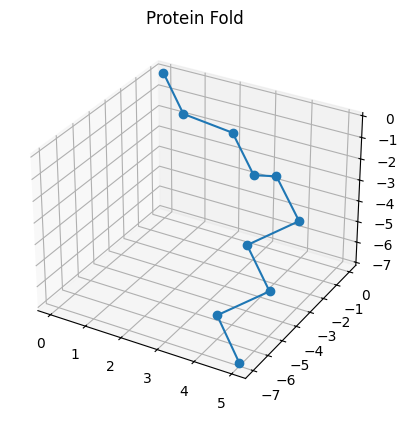

In [24]:

sim = ProteinFoldSimulator(N=10)
seq = sim.random_turn_sequence()
pos = sim.compute_positions()
sim.visualize_fold()
